# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib
import itertools
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle
matplotlib.rc("lines", markeredgewidth=0.5)
from google.colab import drive
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from scipy import sparse


## 1.1 Reading Data

In [31]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
## reading the data matrices with BOW word embeddings

with open('/content/drive/My Drive/Assignment2/X_train_up_bow', 'rb') as f1:
    X_train_bow = pickle.load(f1)

with open('/content/drive/My Drive/Assignment2/Y_train_up', 'rb') as f2:
  Y_train = pickle.load(f2)
  
with open('/content/drive/My Drive/Assignment2/X_cv_up_bow', 'rb') as f3:
  X_cv_bow = pickle.load(f3)
  
with open('/content/drive/My Drive/Assignment2/Y_cv_up', 'rb') as f4:
  Y_cv = pickle.load(f4)
  
with open('/content/drive/My Drive/Assignment2/X_test_up_bow', 'rb') as f5:
  X_test_bow = pickle.load(f5)
  
with open('/content/drive/My Drive/Assignment2/Y_test_up', 'rb') as f6:
  Y_test = pickle.load(f6)


In [7]:
print("Training Data Dimensions:", X_train_bow.shape)
print("Target Dimensions:", Y_train.shape)
print("Cross Validation Data Dimensions:", X_cv_bow.shape)
print("Target Dimensions:", Y_cv.shape)
print("Test Data Dimensions:", X_test_bow.shape)
print("Target Dimensions:", Y_test.shape)

Training Data Dimensions: (110392, 29865)
Target Dimensions: (110392,)
Cross Validation Data Dimensions: (21850, 29865)
Target Dimensions: (21850,)
Test Data Dimensions: (21850, 29865)
Target Dimensions: (21850,)


In [0]:
## reading the data matrices with TFIDF word embeddings

with open('/content/drive/My Drive/Assignment2/X_train_up_tfidf', 'rb') as f1:
    X_train_tfidf = pickle.load(f1)

with open('/content/drive/My Drive/Assignment2/X_cv_up_tfidf', 'rb') as f3:
    X_cv_tfidf = pickle.load(f3)
  
  
with open('/content/drive/My Drive/Assignment2/X_test_up_tfidf', 'rb') as f5:
    X_test_tfidf = pickle.load(f5)
  

In [8]:
print("Training Data Dimensions:", X_train_tfidf.shape)
print("Target Dimensions:", Y_train.shape)
print("Cross Validation Data Dimensions:", X_cv_tfidf.shape)
print("Target Dimensions:", Y_cv.shape)
print("Test Data Dimensions:", X_test_tfidf.shape)
print("Target Dimensions:", Y_test.shape)

Training Data Dimensions: (110392, 29865)
Target Dimensions: (110392,)
Cross Validation Data Dimensions: (21850, 29865)
Target Dimensions: (21850,)
Test Data Dimensions: (21850, 29865)
Target Dimensions: (21850,)


# Assignment 4: Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Naive Bayes </h1>

<h2>2.4 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Naive Bayes on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

In [19]:
# Please write all the code with proper documentation

alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]

auc_scores_cv = dict()
auc_scores_train = dict()
for i in alpha_values:
  print("alpha:", i)
  nb = MultinomialNB(alpha=i)
  nb.fit(X_train_bow, Y_train)
  pred_cv = nb.predict(X_cv_bow)
  pred_train = nb.predict(X_train_bow)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv)
  auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train)
  auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

alpha: 1e-05
Validation-AUC: 0.5871465607983444
Train-AUC: 0.6605460540618886


alpha: 0.0001
Validation-AUC: 0.5867146437531834
Train-AUC: 0.6557721574027103


alpha: 0.001
Validation-AUC: 0.5877021845907178
Train-AUC: 0.6504728603521994


alpha: 0.01
Validation-AUC: 0.5877474850330244
Train-AUC: 0.6442042901659542


alpha: 0.1
Validation-AUC: 0.5897035044228465
Train-AUC: 0.6370026813537213


alpha: 1.0
Validation-AUC: 0.5906704421437632
Train-AUC: 0.629502137836075


alpha: 10
Validation-AUC: 0.59141690890737
Train-AUC: 0.6183962605985941


alpha: 100
Validation-AUC: 0.5969519273819381
Train-AUC: 0.6089028190448582




In [22]:
print(np.log(list(auc_scores_cv.keys())))
       
print(np.log(list(auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019]


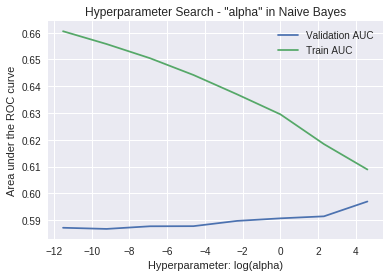

In [20]:
## plot the AUC-ROC against the 'alpha' values for train and cross-validation

plt.plot(np.log(list(auc_scores_cv.keys())), auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(auc_scores_train.keys())), auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - "alpha" in Naive Bayes')
plt.xlabel('Hyperparameter: log(alpha)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.show()

In [49]:
# Fit a model with the optimal hyperparameter value for alpha
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_bow, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = nb.predict_proba(X_test_bow)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = nb.predict_proba(X_train_bow)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)



MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

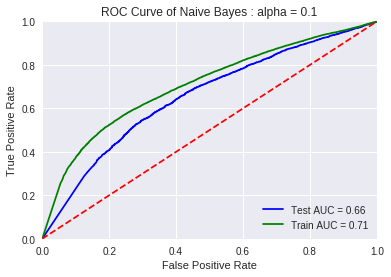

In [39]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : alpha = 0.1')
plt.show()

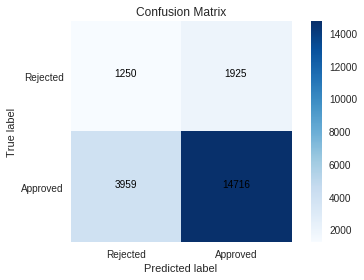

In [35]:
## Confusion Matrix:

# predict the response on the test data
pred_test = nb.predict(X_test_bow)

c_mat = confusion_matrix(Y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure()
plt.title("Confusion Matrix")
plt.imshow(c_mat, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
        plt.text(j, i, c_mat[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()
plt.tight_layout()
plt.show()

#### 2.4.1.1 Top 10 important features of positive class & negative class from<font color='red'> SET 1</font>

In [0]:
with open('/content/drive/My Drive/Assignment2/bow_train_features.pkl', 'rb') as f1:
    bow_train_features = pickle.load(f1)

In [50]:
# Please write all the code with proper documentation
# feature importance naive bayes: https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes

neg_class_prob_sorted = nb.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()

print("Top important features of Negative class:")
print(np.take(bow_train_features, neg_class_prob_sorted[:10]))
print("\n")
print("Top important features of Positive class:")
print(np.take(bow_train_features, pos_class_prob_sorted[:10]))


Top important features of Negative class:
['intervals' 'gold' 'goldberg' 'golden' 'goldfish' 'goldie' 'goldilocks'
 'going' 'golf' 'gonge']


Top important features of Positive class:
['prepping' 'gryphon' 'paintbrush' 'exam' 'pairing' 'pairs' 'pajamas'
 'palettes' 'pallets' 'grownups']


### 2.4.2 Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [40]:
# Please write all the code with proper documentation

alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]

auc_scores_cv = dict()
auc_scores_train = dict()
for i in alpha_values:
  print("alpha:", i)
  nb = MultinomialNB(alpha=i)
  nb.fit(X_train_tfidf, Y_train)
  pred_cv = nb.predict(X_cv_tfidf)
  pred_train = nb.predict(X_train_tfidf)
  
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_cv, pred_cv)
  auc_scores_cv[i] = auc_val
  print("Validation-AUC:", auc_val)
    
  # evaluate CV AUC-ROC
  auc_val = roc_auc_score(Y_train, pred_train)
  auc_scores_train[i] = auc_val
  print("Train-AUC:", auc_val)
  print("\n")
         

alpha: 1e-05
Validation-AUC: 0.5885497739160142
Train-AUC: 0.668825639539097


alpha: 0.0001
Validation-AUC: 0.5913480997807177
Train-AUC: 0.663607870135517


alpha: 0.001
Validation-AUC: 0.5936020719339326
Train-AUC: 0.6562069715196752


alpha: 0.01
Validation-AUC: 0.5942104802067003
Train-AUC: 0.6463874193782159


alpha: 0.1
Validation-AUC: 0.5949638146758465
Train-AUC: 0.6342760344952534


alpha: 1.0
Validation-AUC: 0.5943158290487216
Train-AUC: 0.6167113558953546


alpha: 10
Validation-AUC: 0.5919692749419877
Train-AUC: 0.5957859265164142


alpha: 100
Validation-AUC: 0.5783212950379506
Train-AUC: 0.5713004565548228




In [41]:
print(np.log(list(auc_scores_cv.keys())))
       
print(np.log(list(auc_scores_train.keys())))

[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019]
[-11.51292546  -9.21034037  -6.90775528  -4.60517019  -2.30258509
   0.           2.30258509   4.60517019]


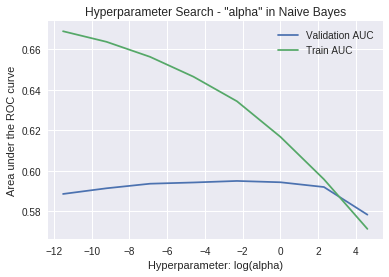

In [42]:
## plot the AUC-ROC against the 'k' values for train and cross-validation

plt.plot(np.log(list(auc_scores_cv.keys())), auc_scores_cv.values(), label='Validation AUC')
plt.plot(np.log(list(auc_scores_train.keys())), auc_scores_train.values(), label='Train AUC')
plt.title('Hyperparameter Search - "alpha" in Naive Bayes')
plt.xlabel('Hyperparameter: log(alpha)')
#plt.ylim([0.4,1.1])
#plt.xlim([0,20])
plt.ylabel('Area under the ROC curve')
plt.legend()
plt.show()

In [0]:
# Fit a model with the optimal hyeperparameter value for alpha
nb = MultinomialNB(alpha=10)
nb.fit(X_train_tfidf, Y_train)

# Area under the ROC Curve
# predict positive class probabilities for test data
pred_test_scores = nb.predict_proba(X_test_tfidf)
fpr_test, tpr_test, threshold = roc_curve(Y_test, pred_test_scores[:, 1])
roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

# predict positive class probabilities for train data
pred_train_scores = nb.predict_proba(X_train_tfidf)
fpr_train, tpr_train, threshold = roc_curve(Y_train, pred_train_scores[:, 1])
roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)



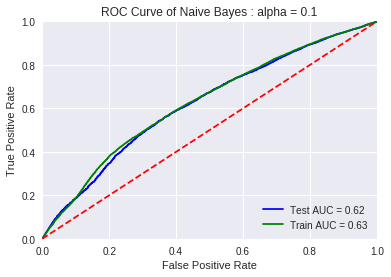

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'Test AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'Train AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes : alpha = 0.1')
plt.show()

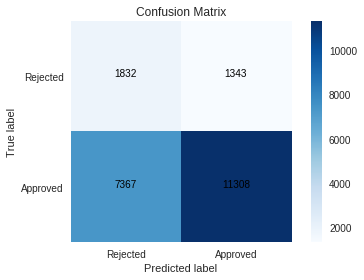

In [45]:
## Confusion Matrix:

# predict the response on the test data
pred_test = nb.predict(X_test_tfidf)

c_mat = confusion_matrix(Y_test, pred_test)

classes = ['Rejected', 'Approved']

plt.figure()
plt.title("Confusion Matrix")
plt.imshow(c_mat, cmap=plt.cm.Blues)
plt.colorbar()
#plt.matshow(c_mat)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i, j in itertools.product(range(c_mat.shape[0]), range(c_mat.shape[1])):
        plt.text(j, i, c_mat[i, j],
                 horizontalalignment="center",
                 color="black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid()
plt.tight_layout()
plt.show()

#### 2.4.2.1 Top 10 important features of positive class & negative class from<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation
with open('/content/drive/My Drive/Assignment2/tfidf_train_features.pkl', 'rb') as f1:
    tfidf_train_features = pickle.load(f1)

In [48]:
# Please write all the code with proper documentation

neg_class_prob_sorted = nb.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()

print("Top important features of Negative class:")
print(np.take(tfidf_train_features, neg_class_prob_sorted[:10]))
print("\n")
print("Top important features of Positive class:")
print(np.take(tfidf_train_features, pos_class_prob_sorted[:10]))


Top important features of Negative class:
['entirely' 'rhyming' 'rhymes' 'rhetoric' 'rex' 'henri' 'henry' 'hens'
 'hep' 'herb']


Top important features of Positive class:
['pairs' 'interpreters' 'cupboards' 'bore' 'curb' 'palettes' 'pallets'
 'superstar' 'internalization' 'interim']
